Demonstrate functions in Scan for setting and reading tones.  Readback can give all samples or the mean.

Note that after setting new tones, the first samples are "left over" from previous reads.  The paramter "iBegin" can be used to remove these samples from the returned values or average.

In [1]:
import importlib
from mkids import TopSoc
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm
import pandas as pd
import Scan
soc = TopSoc()

In [2]:
scan = Scan.Scan(soc)
fMixer = soc.fsIn/2/2
scan.soc.set_mixer(fMixer)

614.4

In [3]:
# Setup tones that are in nearby channels, to fully test multi-tone readout
f0 = fMixer + 1.4
nTones = 10
freqs = f0 + 0.1 + np.arange(nTones)*(1.2*soc.fcOut+0.01)
# Move one tone away from the others
freqs[0] += 34.56
freqs[3] -= 123.456

inCh, dds_freq, pfb_freq, ch = soc.pfb_in.freq2ch(freqs)   
outCh, outOffset = soc.outFreq2chOffset(freqs)
inCh, inOffset = soc.inFreq2chOffset(freqs)
data = np.transpose(np.array([freqs, outCh, outOffset, inCh, inOffset]))
pd.DataFrame(data, columns=["freq","outCh","outOffset", "inCh", "inOffset"])

,freq,outCh,outOffset,inCh,inOffset
0,650.460,15.0,0.060,30.0,0.060
1,618.790,2.0,-0.410,4.0,-0.410
2,621.680,3.0,0.080,6.0,0.080
3,501.114,465.0,-0.486,930.0,-0.486
4,627.460,5.0,1.060,11.0,-0.140
5,630.350,7.0,-0.850,13.0,0.350
6,633.240,8.0,-0.360,16.0,-0.360
7,636.130,9.0,0.130,18.0,0.130
8,639.020,10.0,0.620,21.0,-0.580
9,641.910,11.0,1.110,23.0,-0.090


In [4]:
amps = 0.9*np.ones(len(freqs))/len(freqs)
fis = 1+(0.1*np.arange(len(freqs)))
scan.setTones(freqs, amps, fis)
decimation = 2
scan.prepRead(decimation)

nt = 1
nsamp = 2000
truncate = 1000
x = scan.readAndUnpack(nt=nt, nsamp=nsamp,unpackVerbose=True)

self.packets.shape = (1, 2000, 17)
     packets.shape = (1, 2000, 17)
      ntrans.shape = (1, 2000)
         xis.shape = (1, 2000, 8)
         xqs.shape = (1, 2000, 8)
          xs.shape = (1, 2000, 8)
   nt, iTone , x.shape 0 0 (373,)
   nt, iTone , x.shape 0 1 (506,)
   nt, iTone , x.shape 0 2 (506,)
   nt, iTone , x.shape 0 3 (374,)
   nt, iTone , x.shape 0 4 (374,)
   nt, iTone , x.shape 0 5 (374,)
   nt, iTone , x.shape 0 6 (373,)
   nt, iTone , x.shape 0 7 (373,)
   nt, iTone , x.shape 0 8 (373,)
   nt, iTone , x.shape 0 9 (373,)


Text(0, 0.5, 'Amplitude (ADUs)')

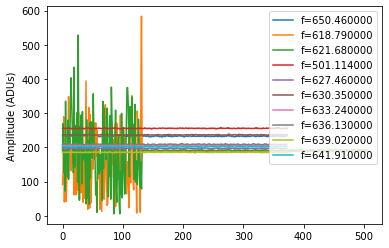

In [5]:
it = 0
for iTone in range(len(x[it])):
    plt.plot(np.abs(x[it][iTone]), label="f=%f"%(freqs[iTone]))
plt.legend()
plt.ylabel("Amplitude (ADUs)")

Text(0, 0.5, 'Phase (Radians)')

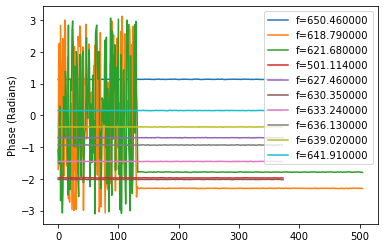

In [6]:
it = 0
for iTone in range(len(x[it])):
    plt.plot(np.angle(x[it][iTone]), label="f=%f"%(freqs[iTone]))
plt.legend()
plt.ylabel("Phase (Radians)")

In [7]:
subtractInputPhase=False

# Setup tones that are in nearby channels, to fully test multi-tone readout
f0 = fMixer + 1.4
nTones = 10
freqs = f0 + 0.1 + np.arange(nTones)*(1.2*soc.fcOut+0.01)
# Move one tone away from the others
freqs[0] += 34.56
freqs[3] -= 123.456
amps = 0.9*np.ones(len(freqs))/len(freqs)
fis = 1+(0.1*np.arange(len(freqs)))
scan.setTones(freqs, amps, fis)
decimation = 2
scan.prepRead(decimation)
nt = 2
nsamp = 20000
truncate = 1000
x = scan.readAndUnpack(nt=nt, nsamp=nsamp, subtractInputPhase=subtractInputPhase)

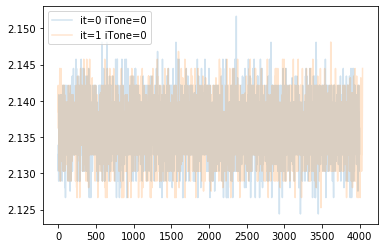

In [8]:
iTone = 0
for it in range(nt):
    plt.plot(np.angle(x[it][iTone]), label="it=%d iTone=%d"%(it,iTone), alpha=0.2)
plt.legend()

In [9]:
#test average=True in unpack
verbose = True
average=True
iBegin=0
xa = scan.unpack(verbose, average, subtractInputPhase, iBegin)

self.packets.shape = (2, 20000, 17)
     packets.shape = (2, 20000, 17)
      ntrans.shape = (2, 20000)
         xis.shape = (2, 20000, 8)
         xqs.shape = (2, 20000, 8)
          xs.shape = (2, 20000, 8)
   nt, iTone , x.shape 0 0 (4001,)
   nt, iTone , x.shape 0 1 (3997,)
   nt, iTone , x.shape 0 2 (3997,)
   nt, iTone , x.shape 0 3 (4001,)
   nt, iTone , x.shape 0 4 (4000,)
   nt, iTone , x.shape 0 5 (4000,)
   nt, iTone , x.shape 0 6 (4001,)
   nt, iTone , x.shape 0 7 (4001,)
   nt, iTone , x.shape 0 8 (4001,)
   nt, iTone , x.shape 0 9 (4001,)
   nt, iTone , x.shape 1 0 (4040,)
   nt, iTone , x.shape 1 1 (3963,)
   nt, iTone , x.shape 1 2 (3963,)
   nt, iTone , x.shape 1 3 (4040,)
   nt, iTone , x.shape 1 4 (4012,)
   nt, iTone , x.shape 1 5 (4012,)
   nt, iTone , x.shape 1 6 (3945,)
   nt, iTone , x.shape 1 7 (3945,)
   nt, iTone , x.shape 1 8 (3945,)
   nt, iTone , x.shape 1 9 (3945,)


In [10]:
xa.shape

(10,)

Text(0.5, 1.0, 'red line is mean of both reads')

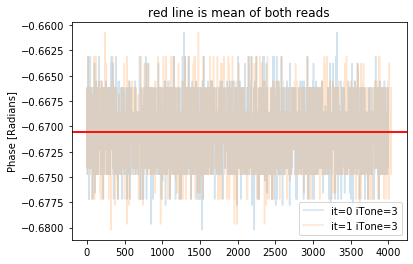

In [11]:
iTone = 3
for it in range(nt):
    plt.plot(np.angle(x[it][iTone]), label="it=%d iTone=%d"%(it,iTone), alpha=0.2)
    plt.axhline(np.angle(xa[iTone]), c='r')
plt.legend()
plt.ylabel("Phase [Radians]")
plt.title("red line is mean of both reads")

In [12]:
soc.adcs

{'20': {'fs': 2457.6, 'f_fabric': 307.2}}